In [114]:
# Import Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings

## Loading The Dataset

In [115]:
# Load the data
df= pd.read_csv('loan_approval_dataset.csv')
data=df
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [116]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


## Descriptive Analysis

In [117]:
df.shape

(4269, 13)

In [118]:

#Returns the first n rows of the DataFrame (default is 5)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [120]:
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [121]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [122]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## Data Visualisation

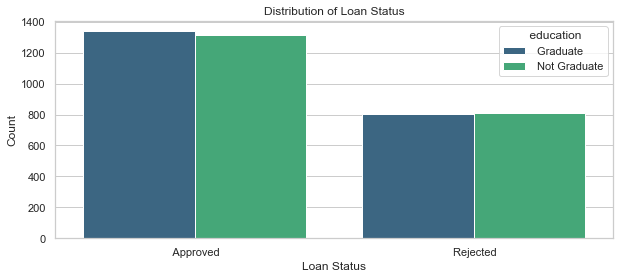

In [123]:
sns.set(style="whitegrid")

# Plot 1: Distribution of Loan Status
plt.figure(figsize=(10, 4))
sns.countplot(x=' loan_status', data=df, palette='viridis', hue= ' education')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

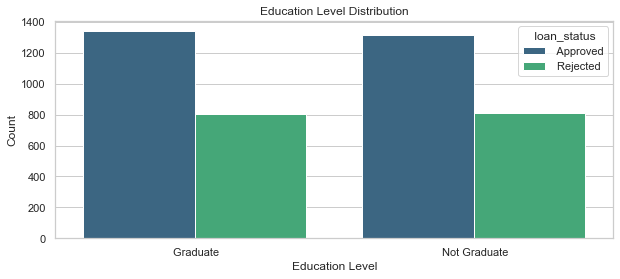

In [124]:

# Plot 2: Education Level Distribution
plt.figure(figsize=(10, 4))
sns.countplot(x=' education', data=df, palette='viridis', hue = ' loan_status')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22524\3305105057.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' self_employed', data=df, palette='viridis')


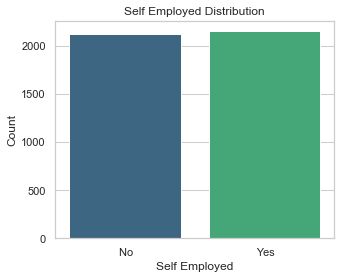

In [125]:

# Plot 3: Self Employed Distribution
plt.figure(figsize=(5, 4))
sns.countplot(x=' self_employed', data=df, palette='viridis')
plt.title('Self Employed Distribution')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.show()

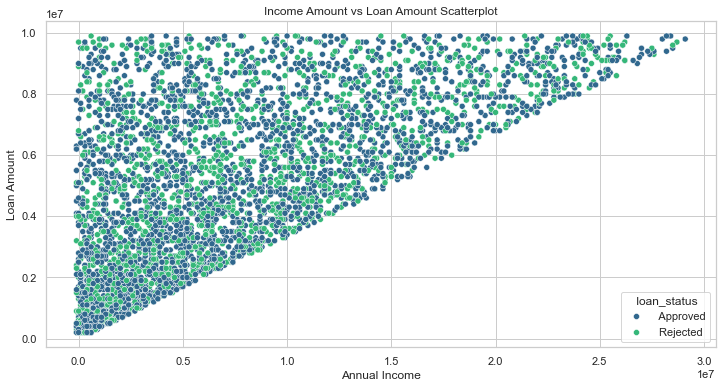

In [126]:
# Plot 6: Income vs Loan Amount Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=' residential_assets_value', y=' income_annum', hue=' loan_status', data=df, palette='viridis')
plt.title('Income Amount vs Loan Amount Scatterplot')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

# Data Preprocessing

## Filtering out the Negative Values

In [127]:
# Filter out rows where 'residential_assets_value' is very low
df = df[df[' residential_assets_value'] >= 10000]

In [128]:

df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4196.000000,4196.000000,4.196000e+03,4.196000e+03,4196.000000,4196.000000,4.196000e+03,4.196000e+03,4.196000e+03,4.196000e+03
mean,2135.894185,2.497140,5.096711e+06,1.524278e+07,10.901335,599.639895,7.603289e+06,4.999809e+06,1.524345e+07,5.015038e+06
std,1231.418202,1.695747,2.792720e+06,9.009593e+06,5.707598,172.480726,6.483402e+06,4.383745e+06,9.071128e+06,3.243334e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1071.750000,1.000000,2.700000e+06,7.800000e+06,6.000000,453.000000,2.300000e+06,1.400000e+06,7.600000e+06,2.400000e+06
50%,2136.500000,3.000000,5.100000e+06,1.465000e+07,10.000000,599.000000,5.800000e+06,3.700000e+06,1.470000e+07,4.600000e+06
75%,3201.250000,4.000000,7.500000e+06,2.160000e+07,16.000000,748.000000,1.140000e+07,7.700000e+06,2.180000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [129]:

#Returns a tuple representing the dimensionality of the DataFrame (number of rows, number of columns).
df.shape

(4196, 13)

In [130]:

#Returns the index (row labels) of the DataFrame.
df.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       4259, 4260, 4261, 4262, 4263, 4264, 4265, 4266, 4267, 4268],
      dtype='int64', length=4196)

In [131]:

#Returns the data type of each column.
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [132]:
#Prints a concise summary of the DataFrame, including the number of non-null entries, data type of each column, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4196 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4196 non-null   int64 
 1    no_of_dependents          4196 non-null   int64 
 2    education                 4196 non-null   object
 3    self_employed             4196 non-null   object
 4    income_annum              4196 non-null   int64 
 5    loan_amount               4196 non-null   int64 
 6    loan_term                 4196 non-null   int64 
 7    cibil_score               4196 non-null   int64 
 8    residential_assets_value  4196 non-null   int64 
 9    commercial_assets_value   4196 non-null   int64 
 10   luxury_assets_value       4196 non-null   int64 
 11   bank_asset_value          4196 non-null   int64 
 12   loan_status               4196 non-null   object
dtypes: int64(10), object(3)
memory usage: 458.9+ KB


## Checking for Duplicate entries in the dataframe

In [133]:

#Checking for the number of duplicates in entire dataframe
df.duplicated().sum()

0

## Missing Value Treatment

In [134]:

#check for missing values
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [135]:

df.columns=[s.strip() for s in df.columns]
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [136]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Categorical Variables to Numeric Encoding

In [137]:

 education_mapping = {
    ' Graduate': 1,
    ' Not Graduate': 0
}

self_employed_mapping = {
    ' Yes': 1,
    ' No': 0
}

loan_status_mapping = {
    ' Approved': 1,
    ' Rejected': 0
}

In [138]:
df['education'] = df['education'].map({' Graduate':1,' Not Graduate':0})
df['self_employed'] = df['self_employed'].map({' Yes':1,' No':0})
df['loan_status'] = df['loan_status'].map({' Approved':1,' Rejected':0})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22524\1535070098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'] = df['education'].map({' Graduate':1,' Not Graduate':0})
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22524\1535070098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['self_employed'] = df['self_employed'].map({' Yes':1,' No':0})
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22524\1535070098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [139]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


## Outlier Treatment

In [140]:
#Finding the maximum value in all assets value
Columns_to_select = ['income_annum', 'loan_amount', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
df[Columns_to_select].max()

income_annum                 9900000
loan_amount                 39500000
residential_assets_value    29100000
commercial_assets_value     19400000
luxury_assets_value         39200000
bank_asset_value            14700000
dtype: int64

In [141]:
df[Columns_to_select].describe()

,income_annum,loan_amount,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4.196000e+03,4.196000e+03,4.196000e+03,4.196000e+03,4.196000e+03,4.196000e+03
mean,5.096711e+06,1.524278e+07,7.603289e+06,4.999809e+06,1.524345e+07,5.015038e+06
std,2.792720e+06,9.009593e+06,6.483402e+06,4.383745e+06,9.071128e+06,3.243334e+06
min,2.000000e+05,3.000000e+05,1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,2.700000e+06,7.800000e+06,2.300000e+06,1.400000e+06,7.600000e+06,2.400000e+06
50%,5.100000e+06,1.465000e+07,5.800000e+06,3.700000e+06,1.470000e+07,4.600000e+06
75%,7.500000e+06,2.160000e+07,1.140000e+07,7.700000e+06,2.180000e+07,7.100000e+06
max,9.900000e+06,3.950000e+07,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## Calculation IQR

In [142]:
Q1 = df[Columns_to_select].quantile(0.25)
Q3 = df[Columns_to_select].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
IQR

income_annum                 4800000.0
loan_amount                 13800000.0
residential_assets_value     9100000.0
commercial_assets_value      6300000.0
luxury_assets_value         14200000.0
bank_asset_value             4700000.0
dtype: float64

In [143]:
# Define the boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [144]:
# Identify outliers
outliers = df[(df[Columns_to_select] < lower_bound) | (df[Columns_to_select] > upper_bound)]
print("Outliers using IQR method:")
print(outliers)

Outliers using IQR method:
      loan_id  no_of_dependents  education  self_employed  income_annum  \
0         NaN               NaN        NaN            NaN           NaN   
1         NaN               NaN        NaN            NaN           NaN   
2         NaN               NaN        NaN            NaN           NaN   
3         NaN               NaN        NaN            NaN           NaN   
4         NaN               NaN        NaN            NaN           NaN   
...       ...               ...        ...            ...           ...   
4264      NaN               NaN        NaN            NaN           NaN   
4265      NaN               NaN        NaN            NaN           NaN   
4266      NaN               NaN        NaN            NaN           NaN   
4267      NaN               NaN        NaN            NaN           NaN   
4268      NaN               NaN        NaN            NaN           NaN   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0

In [145]:
# Remove outliers
df_cleaned = df[~((df[Columns_to_select] < lower_bound) | (df[Columns_to_select] > upper_bound))]
print("DataFrame after removing outliers:")
print(df_cleaned)

DataFrame after removing outliers:
      loan_id  no_of_dependents  education  self_employed  income_annum  \
0         NaN               NaN        NaN            NaN       9600000   
1         NaN               NaN        NaN            NaN       4100000   
2         NaN               NaN        NaN            NaN       9100000   
3         NaN               NaN        NaN            NaN       8200000   
4         NaN               NaN        NaN            NaN       9800000   
...       ...               ...        ...            ...           ...   
4264      NaN               NaN        NaN            NaN       1000000   
4265      NaN               NaN        NaN            NaN       3300000   
4266      NaN               NaN        NaN            NaN       6500000   
4267      NaN               NaN        NaN            NaN       4100000   
4268      NaN               NaN        NaN            NaN       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_va

In [146]:
#The shape of Original dataframe and Cleaned dataframe is same.
#It means there are no Outliers in the givem Dataframe.
df_cleaned.shape

(4196, 13)

# Feature Selection

In [147]:
from sklearn.model_selection import train_test_split
%matplotlib inline

In [148]:
corr_matrix = df.corr()

In [149]:
corr_matrix

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,1.000000,0.004839,0.016121,0.000846,0.013591,0.008966,0.004771,0.017258,0.020540,0.019470,0.000190,0.010853,0.017458
no_of_dependents,0.004839,1.000000,0.005208,0.001839,0.012104,0.000514,-0.020004,-0.004770,0.008622,0.001815,0.006716,0.015592,-0.015521
education,0.016121,0.005208,1.000000,-0.024817,0.011322,0.010972,-0.008278,-0.007679,0.011365,-0.007971,0.011034,0.009394,0.002357
self_employed,0.000846,0.001839,-0.024817,1.000000,-0.000845,-0.002169,0.005302,-0.008040,0.006408,-0.023239,0.001056,-0.001569,-0.002298
income_annum,0.013591,0.012104,0.011322,-0.000845,1.000000,0.926190,0.016275,-0.022928,0.637360,0.635200,0.928011,0.849273,-0.019051
loan_amount,0.008966,0.000514,0.010972,-0.002169,0.926190,1.000000,0.012494,-0.016818,0.594793,0.597987,0.858419,0.785469,0.013227
loan_term,0.004771,-0.020004,-0.008278,0.005302,0.016275,0.012494,1.000000,0.008528,0.007995,-0.001319,0.016414,0.021592,-0.114943
cibil_score,0.017258,-0.004770,-0.007679,-0.008040,-0.022928,-0.016818,0.008528,1.000000,-0.018315,-0.003743,-0.029187,-0.014921,0.770977
residential_assets_value,0.020540,0.008622,0.011365,0.006408,0.637360,0.594793,0.007995,-0.018315,1.000000,0.416651,0.590036,0.525468,-0.015493
commercial_assets_value,0.019470,0.001815,-0.007971,-0.023239,0.635200,0.597987,-0.001319,-0.003743,0.416651,1.000000,0.585445,0.544214,0.005597


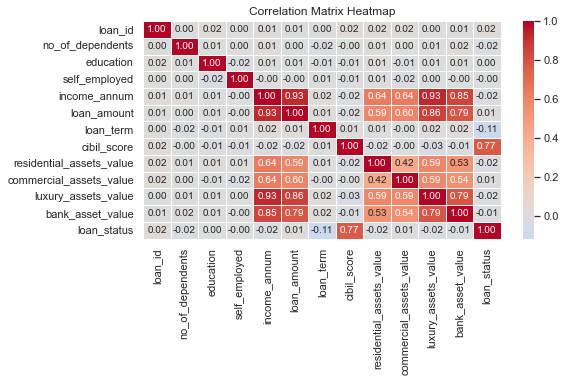

In [150]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 4))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.2f')

# Set the title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [151]:
# Function to identify and filter features based on correlation threshold
def filter_features_by_correlation(df, threshold):
    corr_matrix = df.corr()
    high_corr_features = set()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                high_corr_features.add(colname)

    # Filter the DataFrame and get removed features
    # This line should be indented within the function
    filtered_df = df.drop(columns=high_corr_features)
    return filtered_df, high_corr_features  # Return the filtered DataFrame and removed features


In [152]:
filtered_df, removed_features = filter_features_by_correlation(df, 0.8)

In [153]:
filtered_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_term,cibil_score,residential_assets_value,commercial_assets_value,loan_status
0,1,2,1,0,9600000,12,778,2400000,17600000,1
1,2,0,0,1,4100000,8,417,2700000,2200000,0
2,3,3,1,0,9100000,20,506,7100000,4500000,0
3,4,3,1,0,8200000,8,467,18200000,3300000,0
4,5,5,0,1,9800000,20,382,12400000,8200000,0


In [154]:

removed_features

{'bank_asset_value', 'loan_amount', 'luxury_assets_value'}

## Feature Scaling: Normalization

In [155]:
from sklearn.preprocessing import MinMaxScaler

In [156]:

mms = MinMaxScaler()

In [157]:
filtered_df[['income_annum','loan_term','cibil_score','residential_assets_value','commercial_assets_value']] = mms.fit_transform(filtered_df[['income_annum','loan_term','cibil_score','residential_assets_value','commercial_assets_value']])


In [158]:
filtered_df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_term,cibil_score,residential_assets_value,commercial_assets_value,loan_status
0,1,2,1,0,0.969072,0.555556,0.796667,0.079310,0.907216,1
1,2,0,0,1,0.402062,0.333333,0.195000,0.089655,0.113402,0
2,3,3,1,0,0.917526,1.000000,0.343333,0.241379,0.231959,0
3,4,3,1,0,0.824742,0.333333,0.278333,0.624138,0.170103,0
4,5,5,0,1,0.989691,1.000000,0.136667,0.424138,0.422680,0


In [159]:
X = filtered_df.drop(columns=['loan_id', 'loan_status'])
y = filtered_df['loan_status']

In [160]:

X.head()

,no_of_dependents,education,self_employed,income_annum,loan_term,cibil_score,residential_assets_value,commercial_assets_value
0,2,1,0,0.969072,0.555556,0.796667,0.079310,0.907216
1,0,0,1,0.402062,0.333333,0.195000,0.089655,0.113402
2,3,1,0,0.917526,1.000000,0.343333,0.241379,0.231959
3,3,1,0,0.824742,0.333333,0.278333,0.624138,0.170103
4,5,0,1,0.989691,1.000000,0.136667,0.424138,0.422680


In [161]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

# DATA MODELLING

## Train-Test split

In [163]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56)

In [164]:
# Create an empty DataFrame with the specified columns
report = pd.DataFrame(columns=["model name", "accuracy score"])

## Implementing Decision Tree Model

In [165]:
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [166]:
y_pred_tree = dt_clf.predict(X_test)


In [167]:
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Accuracy: 0.9547259729944401
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       493
           1       0.96      0.97      0.96       766

    accuracy                           0.95      1259
   macro avg       0.95      0.95      0.95      1259
weighted avg       0.95      0.95      0.95      1259



In [168]:
#Appending a new row using concat
new_row = pd.DataFrame([{"model name": "DecisionTreeClassifier", "accuracy score": accuracy_score(y_test, y_pred_tree)}])
report = pd.concat([report, new_row], ignore_index=True)
warnings.filterwarnings("ignore")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22524\3530865238.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  report = pd.concat([report, new_row], ignore_index=True)


## Implementing Random Forest Classifier model

In [169]:
rf_clf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=7)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_estimators=50, random_state=7)

In [170]:
y_pred_forest = rf_clf.predict(X_test)

In [171]:
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

Accuracy: 0.9579030976965845
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       493
           1       0.97      0.96      0.97       766

    accuracy                           0.96      1259
   macro avg       0.96      0.96      0.96      1259
weighted avg       0.96      0.96      0.96      1259



In [172]:
#Appending a new row using concat
new_row = pd.DataFrame([{"model name": "RandomForestClassifier", "accuracy score":accuracy_score(y_test, y_pred_forest)}])
report = pd.concat([report, new_row], ignore_index=True)
warnings.filterwarnings("ignore")

## Implementing Logistic Regression model

In [173]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [174]:
y_pred = lr_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9086576648133439
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       493
           1       0.92      0.93      0.93       766

    accuracy                           0.91      1259
   macro avg       0.91      0.90      0.90      1259
weighted avg       0.91      0.91      0.91      1259



In [175]:
#Appending a new row using concat
new_row = pd.DataFrame([{"model name": "LogisticRegression", "accuracy score":accuracy_score(y_test, y_pred)}])
report = pd.concat([report, new_row], ignore_index=True)
warnings.filterwarnings("ignore")

## Implementing Support Vector Machine model

In [176]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [177]:
y_pred_svm = svm.predict(X_test)

In [178]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.9213661636219221
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       493
           1       0.94      0.93      0.94       766

    accuracy                           0.92      1259
   macro avg       0.92      0.92      0.92      1259
weighted avg       0.92      0.92      0.92      1259



In [179]:
#Appending a new row using concat
new_row = pd.DataFrame([{"model name": "SVC", "accuracy score":accuracy_score(y_test, y_pred_svm)}])
report = pd.concat([report, new_row], ignore_index=True)
warnings.filterwarnings("ignore")

##  Implementing K Nearest Neighbour Classifier model



In [180]:
knn = KNeighborsClassifier(n_neighbors=30)

In [181]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [182]:
y_pred_knn = knn.predict(X_test)

In [183]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.8927720413026211
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       493
           1       0.90      0.93      0.91       766

    accuracy                           0.89      1259
   macro avg       0.89      0.88      0.89      1259
weighted avg       0.89      0.89      0.89      1259



In [184]:
# Appending a new row using concat
new_row = pd.DataFrame([{"model name": "KNeighborsClassifier", "accuracy score":accuracy_score(y_test, y_pred_knn)}])
report = pd.concat([report, new_row], ignore_index=True)
warnings.filterwarnings("ignore")

In [185]:
# Tabular representation of all the models with their accuracy score
report

,model name,accuracy score
0,DecisionTreeClassifier,0.954726
1,RandomForestClassifier,0.957903
2,LogisticRegression,0.908658
3,SVC,0.921366
4,KNeighborsClassifier,0.892772
